# AMES HOUSING
---
# 16. PREPROCESSING: 2. FEATURE ENGINEERING
---

The goal of this chapter is to
- create new features
- scale some of the existing features
- encode some features
- get the dataset ready for model training

## 1. Recap from Previous Chapter
#### 1.1 Introducing the data

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

ames = pd.read_csv('data/Ames_Housing1_train')
print(ames.shape)
ames.head()

(2344, 80)


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,80.0,10400.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1090.0,1090.0,GasA,TA,Y,SBrkr,1370.0,0.0,0.0,1370.0,0.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,479.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,MnPrv,NaN,0.0,6,2009,WD,Family,152000.0
1,60,RL,NaN,28698.0,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,2Story,5,5,1967,1967,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,PConc,TA,Gd,Gd,LwQ,249.0,ALQ,764.0,0.0,1013.0,GasA,TA,Y,SBrkr,1160.0,966.0,0.0,2126.0,0.0,1.0,2,1,3,1,TA,7,Min2,0,NaN,Attchd,1967.0,Fin,2.0,538.0,TA,TA,Y,486.0,0.0,0.0,0.0,225.0,0.0,NaN,NaN,NaN,0.0,6,2009,WD,Abnorml,185000.0
2,90,RL,70.0,9842.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1962,1962,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1224.0,0.0,0.0,1224.0,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1962.0,Unf,2.0,462.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,3,2007,WD,Normal,101800.0
3,90,RL,60.0,7200.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1949,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Fa,N,FuseF,1040.0,0.0,0.0,1040.0,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1956.0,Unf,2.0,420.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,6,2009,WD,Normal,90000.0
4,190,RM,63.0,7627.0,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,2fmCon,2Story,4,6,1920,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,Fa,TA,BrkTil,Fa,Po,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Gd,N,SBrkr,1101.0,600.0,0.0,1701.0,0.0,0.0,2,0,4,2,Fa,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0.0,0.0,148.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,10,2009,WD,Normal,94550.0


#### 1.2 Show columns with missing data

In [2]:
def cols_with_nulls(df):
    df = df.copy()
    null_count = df.isnull().sum()
    null = null_count!=0
    null_only = df[null_count[null].index]
    null_only = null_only.isnull().sum().sort_values()
    return null_only

ames_nulls = cols_with_nulls(ames)
ames_nulls

Total Bsmt SF        1
Garage Area          1
Bsmt Half Bath       1
Bsmt Full Bath       1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Mas Vnr Area        19
Mas Vnr Type        19
Bsmt Cond           61
Bsmt Qual           61
BsmtFin Type 1      61
BsmtFin Type 2      62
Bsmt Exposure       63
Garage Type        120
Garage Finish      122
Garage Qual        122
Garage Cond        122
Garage Yr Blt      122
Lot Frontage       393
Fireplace Qu      1144
Fence             1874
Alley             2182
Misc Feature      2250
Pool QC           2332
dtype: int64

#### 1.3 Preprocessing pipeline step 1

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin

class ContMissFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        miss_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
                 'Total Bsmt SF', 'Garage Area', 'Mas Vnr Area']
        for col in miss_cols:
            df[col] = df[col].fillna(df[col].mean())        
        return df

#### 1.4 Preprocessing pipeline step 2

In [4]:
class LotFrontFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        mean = df['Lot Frontage'].mean()
        df['Lot Frontage'] = df.groupby(['MS SubClass'])['Lot Frontage'].apply(
            lambda x:x.fillna(x.mean()))
        df['Lot Frontage'] = df['Lot Frontage'].fillna(mean)
        return df

#### 1.5 Preprocessing pipeline step 3

In [5]:
class DiscMissFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        miss_cols = ['Garage Cars', 'Bsmt Full Bath', 'Bsmt Half Bath']
        for col in miss_cols:
            df[col] = df[col].fillna(df[col].median()) 
            df[col] = df[col].astype(int)
        return df

#### 1.6 Preprocessing pipeline step 4

In [6]:
class GYBFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):          
        df = df.copy()
        df['Garage Yr Blt'] = ames.groupby(['MS SubClass'])['Garage Yr Blt'].apply(
            lambda x:x.fillna(x.median()))
        df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(
            df['Garage Yr Blt'].median())
        df['Garage Yr Blt'] = df['Garage Yr Blt'].astype(int)
        return df

#### 1.7 Preprocessing pipeline step 5

In [7]:
class NaNExEncoder(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        likert_cols = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 
                       'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 
                       'Garage Cond', 'Pool QC']
        likert_dict = {'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, np.nan: 0}
        for col in likert_cols:
            df[col] = [likert_dict[item] for item in df[col]]
            df[col] = df[col].astype(int)
        return df

#### 1.8 Preprocessing pipeline step 6

In [8]:
class Ord2Encoder(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        ord2_cols = ['Lot Shape', 'Land Slope', 'Bsmt Exposure', 'BsmtFin Type 1',             
             'BsmtFin Type 2', 'Central Air', 'Fence', 'Sale Condition']

        ord2_dict = {'Reg':8, 'IR1':6, 'IR2':4, 'IR3':2, 'Gtl':9, 'Mod':6, 'Sev':3,
                     'Gd':8, 'Av':6, 'Mn':4, 'No':2, 'GLQ':7, 'ALQ':6, 'BLQ':5, 
                     'Rec':4, 'LwQ':3, 'Unf':2, 'Y':10, 'N':5, 'GdPrv':8, 'MnPrv':6, 
                     'GdWo':4, 'MnWw':2, 'Normal':8, 'Abnorml':6, 'AdjLand':5, 'Alloca':4, 
                     'Family':3, 'Partial':2, np.nan:0
                    }
        for col2 in ord2_cols:
            df[col2] = [ord2_dict[item] for item in df[col2]]
        return df

#### 1.9 Preprocessing pipeline step 7

In [9]:
class Ord3Encoder(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        ord3_cols = ['Functional', 'Garage Finish', 'Paved Drive']

        ord3_dict = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 
                     'Sal':1, 'Fin':9, 'RFn':6, 'Unf':3, 'Y':9, 'P':6, 'N':3, np.nan:0
                    }        
        for col3 in ord3_cols:
            df[col3] = [ord3_dict[item] for item in df[col3]]
        return df

#### 1.10 Preprocessing pipeline step 8

In [10]:
class NominalFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        nom_cols = ['Mas Vnr Type', 'Garage Type', 'Alley', 'Misc Feature']              
        for col in nom_cols:
            df[col] = df[col].fillna('None')
        return df

#### 1.11 Pipeline testing

In [11]:
from sklearn.pipeline import Pipeline

pipe_1 = Pipeline(steps = [
    ('cont_filler1', ContMissFiller()),
    ('cont_filler2', LotFrontFiller()),
    ('disc_filler1', DiscMissFiller()),
    ('disc_filler2', GYBFiller()),
    ('likert_encoder', NaNExEncoder()),
    ('ord2_encoder', Ord2Encoder()),
    ('ord3_encoder', Ord3Encoder()),
    ('nom_filler', NominalFiller())
])
pipe1_df = ames.copy()
print('Missing Values Before:', pipe1_df.isnull().sum().sum())
pipe1_df_ = pipe_1.fit_transform(pipe1_df)
print('Missing Values After:', pipe1_df_.isnull().sum().sum())
pipe1_df_.shape

Missing Values Before: 11137
Missing Values After: 0


(2344, 80)

## 2. Creating New Features
Let's create a new colum called `Yrs_until_Remod`

In [12]:
remod_df = ames[['Year Remod/Add', 'Year Built']].copy()
remod_df['Yrs_until_Remod'] = remod_df['Year Remod/Add'] - remod_df['Year Built']
remod_df.isnull().sum()

Year Remod/Add     0
Year Built         0
Yrs_until_Remod    0
dtype: int64

In [13]:
class YrsRemodeler(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        df['Yrs_until_Remod'] = df['Year Remod/Add'] - df['Year Built']
        return df
    
# test
yr_remod = ames[['Year Remod/Add', 'Year Built']].copy()
print(yr_remod.shape)
remodeler = YrsRemodeler()
yr_remod_ = remodeler.fit_transform(yr_remod)
print(yr_remod_.shape)

(2344, 2)
(2344, 3)


## 3. Revisiting Correlation

<AxesSubplot:>

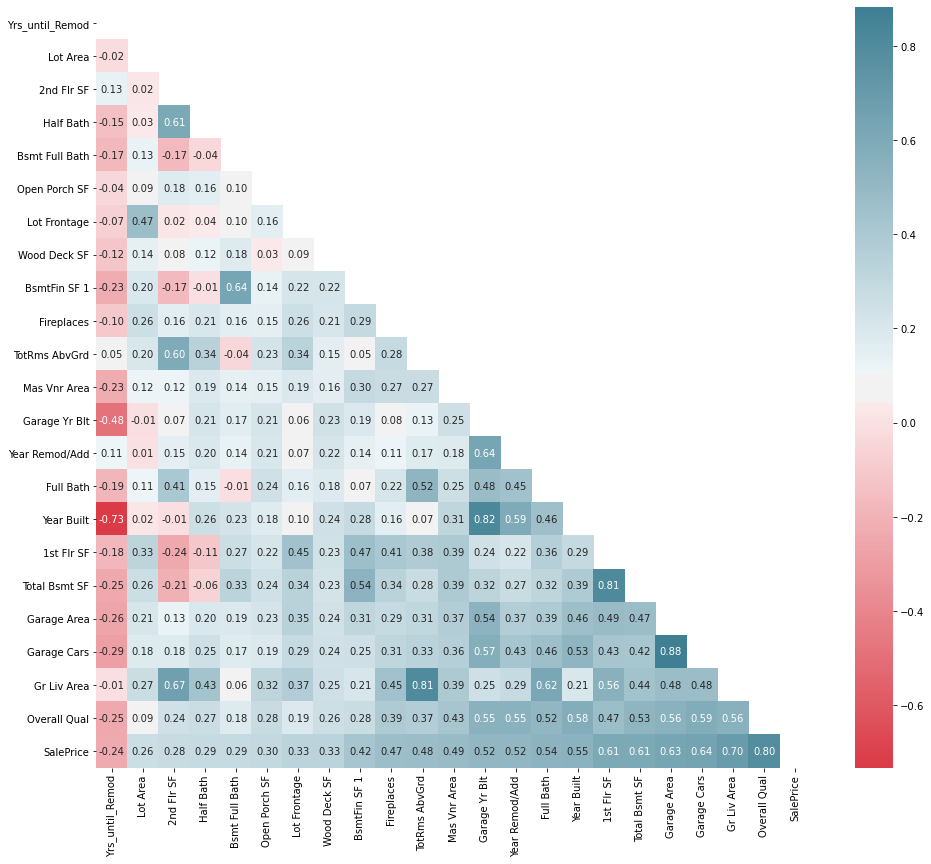

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_df = ames.copy()
corr_df['Yrs_until_Remod'] = remod_df['Yrs_until_Remod'].copy()
corr_matrix = corr_df.corr()
sorted_corr = corr_matrix['SalePrice'].abs().sort_values()
strong_corrs = sorted_corr[sorted_corr > 0.2]

corr = corr_df[strong_corrs.index].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
color = sns.diverging_palette(10, 220, as_cmap=True)
fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(corr, mask=mask, cmap=color, annot=True, 
            fmt=".2f", annot_kws={"size": 10})

The highest correlation coefficient with the target is `0.80`, however, we can see `multicolinearity` in our heatmap. When features are highly correlated, sometimes that can hurt our model. We are going to mark pairs with colinearity `>0.80` and we will remove one of them later on to see if our model will be improved. We can remove the feature with the lower correlation coefficient with the target:
 - 0.88 Garage Area & Garage Cars: keep `Garage Cars`
 - 0.81 1st Flr SF & Total Bsmt SF: keep `Total Bsmt SF`
 - 0.82 Garage Yr Blt & Year Built: keep `Year Built`
 - 0.81 Gr Liv Area & TotRms AbvGrd: keep `Gr Liv Area`

In [15]:
class ColDropper(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        drop_cols = ['Garage Area', '1st Flr SF', 'Garage Yr Blt', 
                     'TotRms AbvGrd']
        for col in drop_cols:
            df = df.drop(col, axis=1)        
        return df
    
# test
col_drop = ames.copy()
print(col_drop.shape)
dropper = ColDropper()
col_drop_ = dropper.fit_transform(col_drop)
print(col_drop_.shape)

(2344, 80)
(2344, 76)


## 4. Encoding Nominal Data

In [16]:
dumb_cols = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape', 
                     'Land Contour', 'Utilities', 'Lot Config', 'Neighborhood', 
                     'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
                     'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
                     'Mas Vnr Type', 'Foundation', 'Heating', 'Electrical', 'Garage Type', 
                     'Misc Feature', 'Sale Type']
len(dumb_cols)

24

In [17]:
class DummyMaker(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        dumb_cols = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 
                     'Utilities', 'Lot Config', 'Neighborhood', 'Condition 1', 
                     'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 
                     'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 
                     'Foundation', 'Heating', 'Electrical', 'Garage Type', 
                     'Misc Feature', 'Sale Type']
        for col in dumb_cols:
            dummies = pd.get_dummies(df[col], prefix=col)
            df = pd.concat([df, dummies], axis=1)
            df = df.drop([col], axis=1)      
        return df
    
# testing
dummy_df = ames.copy()
print(dummy_df.shape)
dumber = DummyMaker()
dummy_df_ = dumber.fit_transform(dummy_df)
print(dummy_df_.shape)

(2344, 80)
(2344, 242)


## 5. Capping Continuous Outliers

In [18]:
class OutlierCapper(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        cont_cols = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 
                     'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
                     '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
                     'Open Porch SF', 'Low Qual Fin SF', 'Enclosed Porch', 
                     '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']
        for col in cont_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            LB = Q1 - (IQR * 1.5)
            UB = Q3 + (IQR * 1.5)
            df.loc[df[col] > UB, col] = UB
            df.loc[df[col] < LB, col] = LB
        return df

In [19]:
# testing our transformers
pipe_2 = Pipeline(steps = [
    ('cont_filler1', ContMissFiller()),
    ('cont_filler2', LotFrontFiller()),
    ('disc_filler1', DiscMissFiller()),
    ('disc_filler2', GYBFiller()),
    ('likert_encoder', NaNExEncoder()),
    ('ord2_encoder', Ord2Encoder()),
    ('ord3_encoder', Ord3Encoder()),
    ('nom_filler', NominalFiller()),
    ('remodeler', YrsRemodeler()),        
    ('dumber', DummyMaker()),
    ('outlying', OutlierCapper()),
    ('dropper', ColDropper())
])
pipe2_df = ames.copy()
print('Missing Values Before:', pipe2_df.isnull().sum().sum())
print('Shape Before', pipe2_df.shape)
pipe2_df_ = pipe_2.fit_transform(pipe2_df)
print('Missing Values After:', pipe2_df_.isnull().sum().sum())
print('Shape After', pipe2_df_.shape)
pipe2_df_.head()

Missing Values Before: 11137
Shape Before (2344, 80)
Missing Values After: 0
Shape After (2344, 242)


,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,...,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,80.000,10400.000,8,9,7,5,1976,1976,189.0,5,5,7,5,2,2,0.0,2,0.0,1090.0,1090.0,5,10,0.0,0.0,1370.0,0,0,2,0,3,1,5,8,1,5,6,2,5,5,9,0.0,0.0,0.0,0.0,0.0,0.0,0,6,0.0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,78.693,17510.875,4,3,5,5,1967,1967,0.0,5,5,5,7,8,3,249.0,6,0.0,0.0,1013.0,5,10,966.0,0.0,2126.0,0,1,2,1,3,1,5,6,0,0,9,2,5,5,9,420.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,70.000,9842.000,8,9,4,5,1962,1962,0.0,5,5,0,0,0,0,0.0,0,0.0,0.0,28.0,5,10,0.0,0.0,1224.0,0,0,2,0,2,2,5,8,0,0,3,2,5,5,9,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,60.000,7200.000,8,9,4,5,1949,1950,0.0,5,5,0,0,0,0,0.0,0,0.0,0.0,28.0,3,5,0.0,0.0,1040.0,0,0,2,0,2,2,5,8,0,0,3,2,5,5,9,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,63.000,7627.000,8,9,4,6,1920,1950,0.0,3,5,3,2,2,2,0.0,2,0.0,600.0,600.0,7,5,600.0,0.0,1701.0,0,0,2,0,4,2,3,8,0,0,0,0,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


## 6. Visualizing the Effect of Capping Outliers
#### Before:

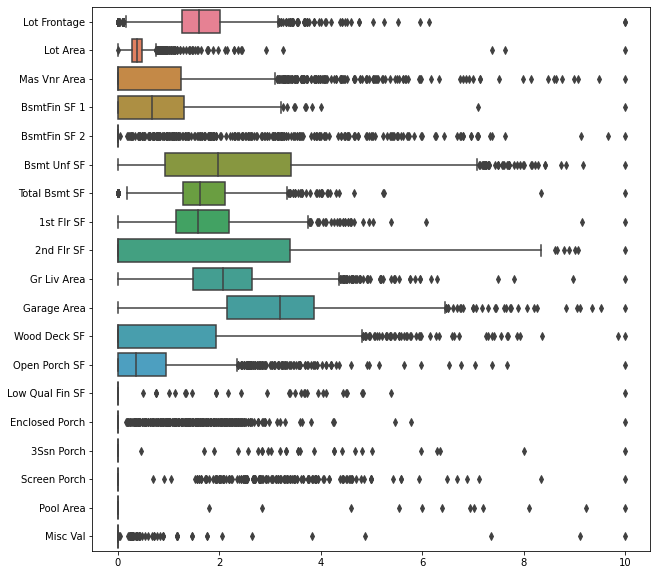

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

cont_cols = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 
             'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
             '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
             'Open Porch SF', 'Low Qual Fin SF', 'Enclosed Porch', 
             '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']
outlier_df = pipe2_df[cont_cols].copy()
scaler = MinMaxScaler(feature_range=(0,10))
outlier_dfs = scaler.fit_transform(outlier_df)
outlier_dfs = pd.DataFrame(outlier_dfs, columns=cont_cols)

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=outlier_dfs, orient="h", palette="husl")

#### After

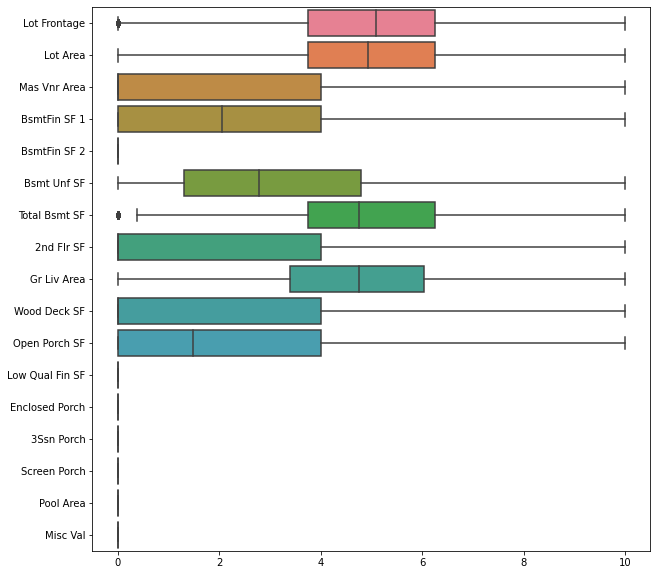

In [21]:
cont2_cols = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 
             'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
             '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 
             'Open Porch SF', 'Low Qual Fin SF', 'Enclosed Porch', 
             '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

outlier_df_ = pipe2_df_[cont2_cols].copy()
scaler_ = MinMaxScaler(feature_range=(0,10))
outlier_dfs_ = scaler.fit_transform(outlier_df_)
outlier_dfs_ = pd.DataFrame(outlier_dfs_, columns=cont2_cols)

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=outlier_dfs_, orient="h", palette="husl")

So capping outliers actually also gets rid of most of the values of some columns especially if the initial data content was mostly made of zeros. This makes sense because if a column is mostly zeros, Q3 might also be zero and UB(upper boundary) might also be zero. We can just keep the data as it is (no capping outliers) and we can leave that for later.

## 7. Standardizing Some Columns

In [22]:
from sklearn.preprocessing import StandardScaler

class DfStdScaler(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        stdizer = StandardScaler()
        std_cols = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 
                     'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
                     '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
                     'Open Porch SF', 'Low Qual Fin SF', 'Enclosed Porch', 
                     '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
                   'Year Remod/Add', 'Yrs_until_Remod', 'Year Built', 'Garage Yr Blt', 
                    'Yr Sold']
        df[std_cols] = stdizer.fit_transform(df[std_cols])
        return df

In [23]:
# testing our transformers
pipe_3 = Pipeline(steps = [
    ('cont_filler1', ContMissFiller()),
    ('cont_filler2', LotFrontFiller()),
    ('disc_filler1', DiscMissFiller()),
    ('disc_filler2', GYBFiller()),
    ('likert_encoder', NaNExEncoder()),
    ('ord2_encoder', Ord2Encoder()),
    ('ord3_encoder', Ord3Encoder()),
    ('nom_filler', NominalFiller()),
    ('remodeler', YrsRemodeler()),        
    ('dumber', DummyMaker()),
    ('stdizer', DfStdScaler()),
    ('dropper', ColDropper())
])
pipe3_df = ames.copy()
print('Missing Values Before:', pipe3_df.isnull().sum().sum())
print('Shape Before', pipe3_df.shape)
pipe3_df_ = pipe_3.fit_transform(pipe3_df)
print('Missing Values After:', pipe3_df_.isnull().sum().sum())
print('Shape After', pipe3_df_.shape)
pipe3_df_.head()

Missing Values Before: 11137
Shape Before (2344, 80)
Missing Values After: 0
Shape After (2344, 242)


,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,...,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,0.469,0.034,8,9,7,5,0.181,-0.381,0.527,5,5,7,5,2,2,-0.979,2,-0.294,1.235,0.098,5,10,-0.781,-0.098,-0.244,0,0,2,0,3,1,5,8,1,5,6,2,5,5,9,-0.754,-0.696,-0.369,-0.099,-0.287,-0.067,0,6,-0.093,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0.410,2.307,4,3,5,5,-0.116,-0.814,-0.575,5,5,5,7,8,3,-0.428,6,4.191,-1.279,-0.078,5,10,1.481,-0.098,1.255,0,1,2,1,3,1,5,6,0,0,9,2,5,5,9,3.139,-0.696,-0.369,-0.099,3.745,-0.067,0,0,-0.093,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0.014,-0.036,8,9,4,5,-0.280,-1.055,-0.575,5,5,0,0,0,0,-0.979,0,-0.294,-1.279,-2.399,5,10,-0.781,-0.098,-0.533,0,0,2,0,2,2,5,8,0,0,3,2,5,5,9,-0.754,-0.696,-0.369,-0.099,-0.287,-0.067,0,0,-0.093,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.441,-0.364,8,9,4,5,-0.709,-1.632,-0.575,5,5,0,0,0,0,-0.979,0,-0.294,-1.279,-2.399,3,5,-0.781,-0.098,-0.898,0,0,2,0,2,2,5,8,0,0,3,2,5,5,9,-0.754,-0.696,-0.369,-0.099,-0.287,-0.067,0,0,-0.093,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.305,-0.311,8,9,4,6,-1.665,-1.632,-0.575,3,5,3,2,2,2,-0.979,2,-0.294,0.105,-1.024,7,5,0.624,-0.098,0.413,0,0,2,0,4,2,3,8,0,0,0,0,0,0,3,-0.754,-0.696,1.839,-0.099,-0.287,-0.067,0,0,-0.093,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


## 8. Saving Pipeline with `joblib`

In [24]:
import joblib

pipeline_1 = Pipeline([
    ('cont_filler1', ContMissFiller()),
    ('cont_filler2', LotFrontFiller()),
    ('disc_filler1', DiscMissFiller()),
    ('disc_filler2', GYBFiller()),
    ('likert_encoder', NaNExEncoder()),
    ('ord2_encoder', Ord2Encoder()),
    ('ord3_encoder', Ord3Encoder()),
    ('nom_filler', NominalFiller()),
    ('remodeler', YrsRemodeler()),        
    ('dumber', DummyMaker()),
    ('stdizer', DfStdScaler())
])
ames_1 = ames.copy()
pipeline_1.fit(ames_1)

Pipeline(steps=[('cont_filler1', ContMissFiller()),
                ('cont_filler2', LotFrontFiller()),
                ('disc_filler1', DiscMissFiller()),
                ('disc_filler2', GYBFiller()),
                ('likert_encoder', NaNExEncoder()),
                ('ord2_encoder', Ord2Encoder()),
                ('ord3_encoder', Ord3Encoder()),
                ('nom_filler', NominalFiller()), ('remodeler', YrsRemodeler()),
                ('dumber', DummyMaker()), ('stdizer', DfStdScaler())])

In [25]:
joblib.dump(pipeline_1, 'files/ames_fit_pipeline')

['files/ames_fit_pipeline']

## 9. HTML Representation of the Pipeline

In [26]:
from sklearn import set_config
set_config(display='diagram')

pipeline_1

Pipeline(steps=[('cont_filler1', ContMissFiller()),
                ('cont_filler2', LotFrontFiller()),
                ('disc_filler1', DiscMissFiller()),
                ('disc_filler2', GYBFiller()),
                ('likert_encoder', NaNExEncoder()),
                ('ord2_encoder', Ord2Encoder()),
                ('ord3_encoder', Ord3Encoder()),
                ('nom_filler', NominalFiller()), ('remodeler', YrsRemodeler()),
                ('dumber', DummyMaker()), ('stdizer', DfStdScaler())])

This looks great! Next is `MODEL TRAINING`